 # 4.0 Preprocessing data

# Import liblaries

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 100)
df = pd.read_csv('data/Placement_Data_Full_Class.csv')
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


# 4.1 Label Encoding

In [45]:
from sklearn.preprocessing import LabelEncoder

object_cols=['gender','workex','specialisation']

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    df[col] = label_encoder.fit_transform(df[col])
 
df.head()



,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,91.00,Commerce,58.00,Sci&Tech,0,55.0,1,58.80,1,270000.0
1,1,79.33,78.33,Science,77.48,Sci&Tech,1,86.5,0,66.28,1,200000.0
2,1,65.00,68.00,Arts,64.00,Comm&Mgmt,0,75.0,0,57.80,1,250000.0
3,1,56.00,52.00,Science,52.00,Sci&Tech,0,66.0,1,59.43,0,NaN
4,1,85.80,73.60,Commerce,73.30,Comm&Mgmt,0,96.8,0,55.50,1,425000.0


# 4.2 One hot encoding

In [46]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
feature_arry = ohe.fit_transform(df[["hsc_s", "degree_t"]]).toarray()


feature_labels = ohe.categories_

np.array(feature_labels).ravel()
feature_labels = np.array(feature_labels).ravel()
# print(feature_labels)
encoded = pd.DataFrame(feature_arry, columns = feature_labels)
# print(encoded)
# print(df)

df_coded = pd.concat([df, encoded],axis=1)
# print(placement_coded)

df_coded.drop(['hsc_s','degree_t','salary'],axis=1, inplace=True)
df_coded.tail(10)

,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status,Arts,Commerce,Science,Comm&Mgmt,Others,Sci&Tech
205,1,61.00,62.0,65.0,0,62.00,0,56.81,1,0.0,1.0,0.0,1.0,0.0,0.0
206,1,41.00,42.0,60.0,0,97.00,0,53.39,0,0.0,0.0,1.0,1.0,0.0,0.0
207,1,83.33,78.0,61.0,1,88.56,0,71.55,1,0.0,1.0,0.0,1.0,0.0,0.0
208,0,43.00,60.0,65.0,0,92.66,1,62.92,0,0.0,0.0,1.0,1.0,0.0,0.0
209,1,62.00,72.0,65.0,0,67.00,0,56.49,1,0.0,1.0,0.0,1.0,0.0,0.0
210,1,80.60,82.0,77.6,0,91.00,0,74.49,1,0.0,1.0,0.0,1.0,0.0,0.0
211,1,58.00,60.0,72.0,0,74.00,0,53.62,1,0.0,0.0,1.0,0.0,0.0,1.0
212,1,67.00,67.0,73.0,1,59.00,0,69.72,1,0.0,1.0,0.0,1.0,0.0,0.0
213,0,74.00,66.0,58.0,0,70.00,1,60.23,1,0.0,1.0,0.0,1.0,0.0,0.0
214,1,62.00,58.0,53.0,0,89.00,1,60.22,0,0.0,0.0,1.0,1.0,0.0,0.0


# 4.3 Assigning the target(y) and predictor variable(X)

In [47]:
X=df_coded.drop(['status'],axis=1)
y=df_coded.status

In [48]:
feature_cols=['gender','ssc_p','hsc_p','hsc_p','workex','etest_p','specialisation','mba_p',
              'dummy_Arts','dummy_Commerce','dummy_Science','dummy_Comm&Mgmt','dummy_Others','dummy_Sci&Tech']
len(feature_cols)

14

> # Split data Xtrain and Ytrain

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8,random_state=42)
print("Input Training:",X_train.shape)
print("Input Test:",X_test.shape)
print("Output Training:",y_train.shape)
print("Output Test:",y_test.shape)

Input Training: (172, 14)
Input Test: (43, 14)
Output Training: (172,)
Output Test: (43,)


> # 5.0 ML models

# 5.1 Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.88


# 5.2 Confusion matrix and Classification report¶

In [51]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",confusion_matrix)
from sklearn.metrics import classification_report
print("Classification Report:\n",classification_report(y_test, y_pred))

Confusion Matrix:
 [[ 9  3]
 [ 2 29]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.75      0.78        12
           1       0.91      0.94      0.92        31

    accuracy                           0.88        43
   macro avg       0.86      0.84      0.85        43
weighted avg       0.88      0.88      0.88        43



# 5.3 ROC Curve

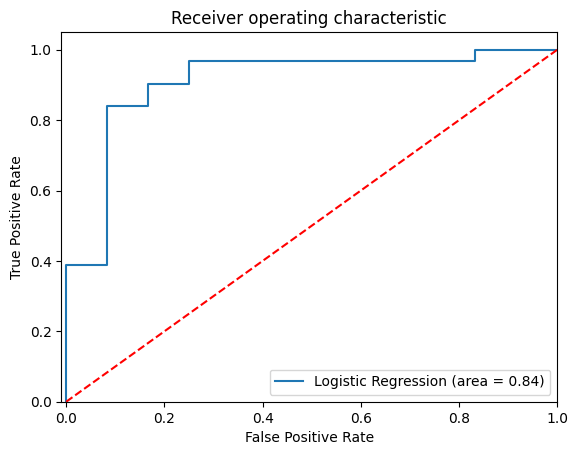

In [52]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# 5.4 Decision Tree

In [53]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion="entropy", max_depth=3)
dt = dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7441860465116279


In [54]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion="gini", max_depth=3)
dt = dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.813953488372093


# 5.5 Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier
rt=RandomForestClassifier(n_estimators=100)
rt.fit(X_train,y_train)
y_pred=rt.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8372093023255814


# 5.6 K Nearest Neighbours

In [56]:
from sklearn.ensemble import RandomForestClassifier
rt=RandomForestClassifier(n_estimators=100)
rt.fit(X_train,y_train)
y_pred=rt.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7906976744186046


# 5.7 Looking at Feature Importance

Text(0.5, 1.0, 'Visualizing Important Features')

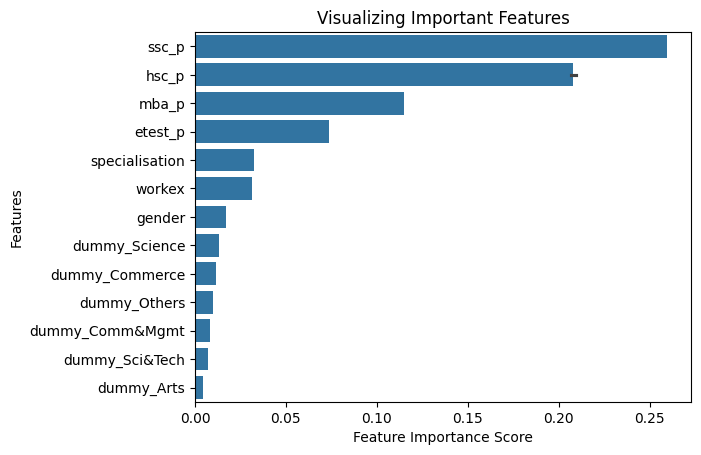

In [57]:
feature_imp = pd.Series(rt.feature_importances_,index=feature_cols).sort_values(ascending=False)
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")

# 5.8 K Nearest Neighbours

In [58]:
from sklearn.neighbors import KNeighborsClassifier
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

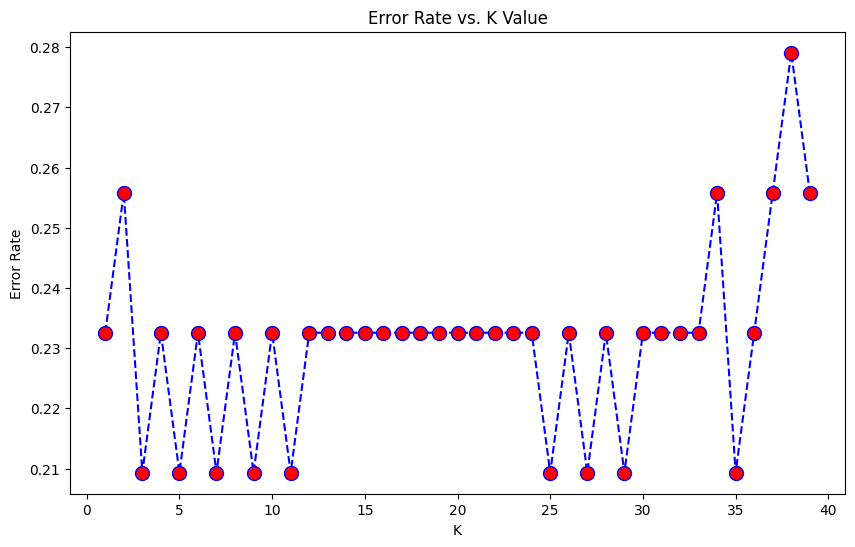

In [59]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Our K value is 5

In [60]:
from sklearn.metrics import confusion_matrix
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",confusion_matrix)
print("Classification Report:\n",classification_report(y_test, y_pred))

Confusion Matrix:
 [[ 4  8]
 [ 1 30]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.33      0.47        12
           1       0.79      0.97      0.87        31

    accuracy                           0.79        43
   macro avg       0.79      0.65      0.67        43
weighted avg       0.79      0.79      0.76        43



# 5.9 Naive Bayes Classifier with Cross Validation

In [61]:
#Importing and fitting
from sklearn.naive_bayes import BernoulliNB 
from sklearn.model_selection import cross_val_score
gnb = BernoulliNB() 
gnb.fit(X_train, y_train) 
  
#Applying and predicting 
y_pred = gnb.predict(X_test) 
cv_scores = cross_val_score(gnb, X, y, 
                            cv=10,
                            scoring='precision')
print("Cross-validation precision: %f" % cv_scores.mean())

Cross-validation precision: 0.720136


# 5.9.1 Support Vector Machine

In [62]:
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
confusion_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n",confusion_matrix)
print("Classification Report:\n",classification_report(y_test,y_pred))

Confusion Matrix:
 [[ 9  3]
 [ 2 29]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.75      0.78        12
           1       0.91      0.94      0.92        31

    accuracy                           0.88        43
   macro avg       0.86      0.84      0.85        43
weighted avg       0.88      0.88      0.88        43



# 6.0 Hyperparameter tuning with Gridsearchcv

In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train, y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.001, 'penalty': 'l2'}
accuracy : 0.8611111111111113
